In this notebook, you will explore a Fermi-LAT extension analysis for (real) LAT data that spans 12 years (August 4 2008 - May 3 2020) over the energies 300MeV to 2TeV for a final known gamma-ray emitting source in the Milky Way Galactic plane. 

## Example Analysis of a Pulsar Wind Nebula candidate 4FGL J1810.3-1925e (overlaps with two known radio SNRs)

We are performing a [binned likelihood analysis](https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/binned_likelihood_tutorial.html) with Fermipy using ~12-years of LAT data in the region that contains plerionic SNRs G11.0-0.05 and G11.1+0.08. 

You should have the following files already in your home directory:
* ``EV*.fits where * is 0,1,2,3,4``
* ``events.txt``

and in your FermiPy working directory (``./data_300mev-2tev_12-year``):
* ``ltcube_00.fits``
* ``srcmdl_00.xml``
* ``srcmap_00.fits``

This time we won't need a new SC file. This is because the last one we downloaded was almost 1.7GB! Instead, we will use the SC file in the ```msh15-56_simple_extension_analysis_example```. **Note: You may only do this if the time selection for the SC file and the dataset IS IDENTICAL**. In this case we are using same time selection. 

Verify all necessary files exist:

In [1]:
ls ./

Advanced_Extension_Analysis.ipynb
config_300mev-2tev_12-year.yaml
data_300mev-2tev_12-year/
EV00.fits
EV01.fits
EV02.fits
EV03.fits
EV04.fits
events.txt
example_of_corrected_fractional_count_residuals_successful_fit.pdf
fractional_count_residuals_failed_fit.png
fractional_count_residuals_successful_fit.png
global_source_count_spectrum_failed_fit.png
global_source_count_spectrum_successful_fit.png
gtlike.py
lat_data_server_output.png
lat_data_server_params.png
SC00.fits@


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from fermipy.gtanalysis import GTAnalysis

## Make the configuration file

In [3]:
config = open('config_300mev-2tev_12-year.yaml',"w")
config.close()
config = open('config_300mev-2tev_12-year.yaml',"a")
config.write("data:\n evfile : events.txt\n scfile : ../msh15-56_simple_extension_analysis_example/SC00.fits\n\n")
config.write("binning:\n roiwidth   : 10.0\n binsz      : 0.1\n binsperdec : 10\n\n") 
config.write("selection:\n emin    : 300\n emax    : 2e6\n zmax    : 100\n evclass : 128\n tmin    : 239500801.000\n tmax    : 610156805.000\n filter  : 'DATA_QUAL>0 && LAT_CONFIG==1'\n target  : '4FGL J1810.3-1925e'\n\n")
config.write("gtlike:\n edisp : True\n irfs  : 'P8R3_SOURCE_V3'\n edisp_disable  : ['isodiff', 'galdiff']\n\n")
config.write("model:\n src_roiwidth : 15.0\n galdiff  : '$CONDA_PREFIX/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits'\n isodiff  : 'iso_P8R3_SOURCE_V3_PSF3_v1.txt'\n extdir   : '$CONDA_PREFIX/LAT_extended_sources_12years/Templates'\n catalogs : '4FGL-DR2'\n\n")
config.write("components:\n - { selection : { evtype : 32 } } # PSF3\n\n")
config.write("fileio: \n outdir : data_300mev-2tev_12-year\n\n\n")
config.close()

## Load in the config file and initialize the initial source model fit. 

In [4]:
gta = GTAnalysis('config_300mev-2tev_12-year.yaml',logging={'verbosity' : 3})

2023-05-23 18:03:37 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 1.2.0 
ScienceTools version 2.2.11


In [5]:
gta.setup()

2023-05-23 18:03:39 INFO    GTAnalysis.setup(): Running setup.
2023-05-23 18:03:39 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2023-05-23 18:03:39 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2023-05-23 18:03:39 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
2023-05-23 18:03:41 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54682.655283 from DATE-OBS.
Set MJD-END to 58972.000000 from DATE-END'. [astropy.wcs.wcs]
2023-05-23 18:03:42 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2023-05-23 18:03:42 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2023-05-23 18:03:42 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.


Drm_Cache::update Measured counts < 0 4FGL J1749.0-2119 37 -1.32131e-18 1.23101e-17
67.5252 59.3783 48.8222 37.464 26.8933 18.29 11.6625 7.00621 3.9684 2.11574 1.07003 0.507083 0.226902 0.0985307 0.0409828 0.0159265 0.00590991 0.0020843 0.000695234 0.000220411 6.61874e-05 1.8838e-05 5.01408e-06 1.24582e-06 2.91775e-07 6.42027e-08 1.33149e-08 2.61368e-09 4.94177e-10 9.1758e-11 1.53128e-11 2.52473e-12 3.95226e-13 5.80615e-14 7.78279e-15 9.70769e-16 1.13259e-16 1.23101e-17 


2023-05-23 18:04:24 INFO    GTAnalysis.setup(): Initializing source properties
2023-05-23 18:04:28 INFO    GTAnalysis.setup(): Finished setup.


In [6]:
gta.print_roi()

2023-05-23 18:05:15 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1810.3-1925e  RadialDisk     LogParabola       0.000       nan      2726.3
4FGL J1811.5-1925   PointSource    PowerLaw          0.280       nan       378.9
4FGL J1808.8-1949c  PointSource    PowerLaw          0.537       nan       852.6
4FGL J1811.5-1844   PointSource    LogParabola       0.741       nan      1776.4
4FGL J1808.2-2028e  RadialDisk     LogParabola       1.166       nan      3161.6
4FGL J1818.1-2000   PointSource    LogParabola       1.921       nan       212.0
4FGL J1813.1-1737e  RadialDisk     LogParabola       1.928       nan      7074.7
4FGL J1804.9-1745   PointSource    PowerLaw          2.109       nan       545.4
4FGL J1806.2-2126   PointSource    LogParabola       2.221       nan      3142.2
4FGL J1818.5-2036   PointSource    PowerLaw          2.2

In [7]:
opt = gta.optimize()

2023-05-23 18:05:16 INFO    GTAnalysis.optimize(): Starting


Joint fit  ['galdiff', '4FGL J1809.8-2332', '4FGL J1801.3-2326e', '4FGL J1826.2-1450', '4FGL J1801.6-2326']


/opt/anaconda/envs/fermi/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape galdiff TS: 1697482.193
Fitting shape 4FGL J1809.8-2332 TS:  39748.133
Fitting shape 4FGL J1826.2-1450 TS:   6806.031
Fitting shape 4FGL J1801.3-2326e TS:   2144.638
Fitting shape 4FGL J1833.6-2103 TS:   1758.263
Fitting shape 4FGL J1801.6-2326 TS:   1546.055
Fitting shape 4FGL J1803.1-2148 TS:   1368.597
Fitting shape 4FGL J1813.1-1737e TS:    864.106
Fitting shape 4FGL J1806.2-2126 TS:    490.398
Fitting shape 4FGL J1818.6-1533 TS:    448.227
Fitting shape isodiff TS:    396.602
Fitting shape 4FGL J1827.4-1445 TS:    322.623
Fitting shape 4FGL J1804.7-2144e TS:    301.145
Fitting shape 4FGL J1805.6-2136e TS:    265.073
Fitting shape 4FGL J1820.4-1609c TS:    194.531
Fitting shape 4FGL J1830.7-1634 TS:    175.637
Fitting shape 4FGL J1817.1-1742 TS:    159.588
Fitting shape 4FGL J1810.3-1925e TS:    138.012
Fitting shape 4FGL J1800.9-2407 TS:    137.808
Fitting shape 4FGL J1759.7-2141 TS:    132.631
Fitting shape 4FGL J1808.2-2028e TS:    129.158
Fitting shape 4FGL J1811.

2023-05-23 18:08:31 INFO    GTAnalysis.optimize(): Finished
2023-05-23 18:08:31 INFO    GTAnalysis.optimize(): LogLike: 772938.540666 Delta-LogLike: 914.974143
2023-05-23 18:08:31 INFO    GTAnalysis.optimize(): Execution time: 195.61 s


In [8]:
gta.print_roi()

2023-05-23 18:08:31 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1810.3-1925e  RadialDisk     LogParabola       0.000    149.94      2389.1
4FGL J1811.5-1925   PointSource    PowerLaw          0.280     31.81       251.2
4FGL J1808.8-1949c  PointSource    PowerLaw          0.537     45.16      1144.6
4FGL J1811.5-1844   PointSource    LogParabola       0.741    133.42      1791.0
4FGL J1808.2-2028e  RadialDisk     LogParabola       1.166    131.43      2795.2
4FGL J1818.1-2000   PointSource    LogParabola       1.921     35.48       142.6
4FGL J1813.1-1737e  RadialDisk     LogParabola       1.928    954.53      6947.6
4FGL J1804.9-1745   PointSource    PowerLaw          2.109     29.51       473.4
4FGL J1806.2-2126   PointSource    LogParabola       2.221    470.25      3497.7
4FGL J1818.5-2036   PointSource    PowerLaw          2.2

In [9]:
gta.delete_sources(minmax_ts=[-1,15])
gta.delete_sources(minmax_npred=[-1,5])

2023-05-23 18:08:31 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1818.5-2036
2023-05-23 18:08:32 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1814.1-1710
2023-05-23 18:08:32 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1758.3-1920
2023-05-23 18:08:32 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1757.1-1926
2023-05-23 18:08:32 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1755.6-2050
2023-05-23 18:08:32 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1818.8-2255
2023-05-23 18:08:32 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1810.5-1415
2023-05-23 18:08:32 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1748.2-1942
2023-05-23 18:08:32 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1815.8-1416
2023-05-23 18:08:32 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1747.8-1827
2023-05-23 18:08:32 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1806.9-2455c
2023-05-2

In [10]:
gta.print_roi()

2023-05-23 18:08:37 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1810.3-1925e  RadialDisk     LogParabola       0.000    149.94      2389.1
4FGL J1811.5-1925   PointSource    PowerLaw          0.280     31.81       251.2
4FGL J1808.8-1949c  PointSource    PowerLaw          0.537     45.16      1144.6
4FGL J1811.5-1844   PointSource    LogParabola       0.741    133.42      1791.0
4FGL J1808.2-2028e  RadialDisk     LogParabola       1.166    131.43      2795.2
4FGL J1818.1-2000   PointSource    LogParabola       1.921     35.48       142.6
4FGL J1813.1-1737e  RadialDisk     LogParabola       1.928    954.53      6947.6
4FGL J1804.9-1745   PointSource    PowerLaw          2.109     29.51       473.4
4FGL J1806.2-2126   PointSource    LogParabola       2.221    470.25      3497.7
4FGL J1817.1-1742   PointSource    PLSuperExpCuto    2.3

In [11]:
# Free spectral parameters of all sources within 3 deg of ROI center
gta.free_sources(distance=3.0)

# Free the normalization of sources with TS > 25
gta.free_sources(minmax_ts=[25,None],pars=['norm'])

# Free all parameters of isotropic and galactic diffuse components. 
#Typically this happens when you set sources within 3.0degree to be free, but just in case we do it again.
gta.free_source('galdiff')
gta.free_source('isodiff')

#free all spectral parameters for our source of interest
gta.free_source('4FGL J1810.3-1925e')

2023-05-23 18:08:37 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1810.3-1925e    : ['norm', 'alpha', 'beta']
2023-05-23 18:08:37 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1811.5-1925     : ['Prefactor', 'Index']
2023-05-23 18:08:37 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1808.8-1949c    : ['Prefactor', 'Index']
2023-05-23 18:08:37 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1811.5-1844     : ['norm', 'alpha', 'beta']
2023-05-23 18:08:37 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1808.2-2028e    : ['norm', 'alpha', 'beta']
2023-05-23 18:08:37 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1818.1-2000     : ['norm', 'alpha', 'beta']
2023-05-23 18:08:37 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1813.1-1737e    : ['norm', 'alpha', 'beta']
2023-05-23 18:08:37 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1804.9-1745     : ['Prefactor', 'I

In [12]:
baseline_fit = gta.fit(min_fit_quality=3)

2023-05-23 18:08:37 INFO    GTAnalysis.fit(): Starting fit.
2023-05-23 18:13:33 ERROR   GTAnalysis.fit(): MINUIT failed with status code 102 fit quality 2


Hmmm... something is wrong. Let's remove the fit quality threshold to get a fit measurement to inspect what may be going wrong. 

In [13]:
baseline_fit = gta.fit()

2023-05-23 18:13:33 INFO    GTAnalysis.fit(): Starting fit.
2023-05-23 18:15:00 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   2 Status: 102
2023-05-23 18:15:00 INFO    GTAnalysis.fit(): LogLike:   772823.198 DeltaLogLike:       54.379 


View the current fit measurements (status, quality, and loglikelihood value). Status not equal to zero means the optimizer did NOT run successfully. Fit quality should be = 3 for successful fits. Anything lower requires assumptions and is therefore inaccurate. 

In [14]:
print(baseline_fit['fit_status'])
print(baseline_fit['fit_quality'])
print(baseline_fit['loglike'])

102
2
772823.1981692276


In [15]:
gta.print_roi()

2023-05-23 18:15:00 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1810.3-1925e  RadialDisk     LogParabola       0.000    141.85      2178.2
4FGL J1811.5-1925   PointSource    PowerLaw          0.280     32.11       252.7
4FGL J1808.8-1949c  PointSource    PowerLaw          0.537     64.70      1480.2
4FGL J1811.5-1844   PointSource    LogParabola       0.741    148.50      1964.0
4FGL J1808.2-2028e  RadialDisk     LogParabola       1.166    120.43      2784.6
4FGL J1818.1-2000   PointSource    LogParabola       1.921     36.52       175.0
4FGL J1813.1-1737e  RadialDisk     LogParabola       1.928    989.21      7306.0
4FGL J1804.9-1745   PointSource    PowerLaw          2.109     23.91       414.9
4FGL J1806.2-2126   PointSource    LogParabola       2.221    347.37      2996.0
4FGL J1817.1-1742   PointSource    PLSuperExpCuto    2.3

In [16]:
baseline = gta.write_roi('baseline_model.npy',make_plots=True)

2023-05-23 18:15:00 INFO    GTBinnedAnalysis.write_xml(): Writing /jeagle/extended_analysis/advanced_extension_analysis_example/data_300mev-2tev_12-year/baseline_model_00.xml...
2023-05-23 18:15:01 INFO    GTAnalysis.write_fits(): Writing /jeagle/extended_analysis/advanced_extension_analysis_example/data_300mev-2tev_12-year/baseline_model.fits...
2023-05-23 18:15:09 INFO    GTAnalysis.write_roi(): Writing /jeagle/extended_analysis/advanced_extension_analysis_example/data_300mev-2tev_12-year/baseline_model.npy...


In [17]:
ls data_300mev-2tev_12-year/*.png

data_300mev-2tev_12-year/baseline_model_counts_map_2.477_6.301.png
data_300mev-2tev_12-year/baseline_model_counts_map_xproj_2.477_6.301.png
data_300mev-2tev_12-year/baseline_model_counts_map_yproj_2.477_6.301.png
data_300mev-2tev_12-year/baseline_model_counts_spectrum.png
data_300mev-2tev_12-year/baseline_model_model_map_2.477_6.301.png
data_300mev-2tev_12-year/baseline_refit_model_counts_map_2.477_6.301.png
data_300mev-2tev_12-year/baseline_refit_model_counts_map_xproj_2.477_6.301.png
data_300mev-2tev_12-year/baseline_refit_model_counts_map_yproj_2.477_6.301.png
data_300mev-2tev_12-year/baseline_refit_model_counts_spectrum.png
data_300mev-2tev_12-year/baseline_refit_model_model_map_2.477_6.301.png
data_300mev-2tev_12-year/ps_model_counts_map_2.477_6.301.png
data_300mev-2tev_12-year/ps_model_counts_map_xproj_2.477_6.301.png
data_300mev-2tev_12-year/ps_model_counts_map_yproj_2.477_6.301.png
data_300mev-2tev_12-year/ps_model_counts_spectrum.png
data_300mev-2tev_12-year/ps_model_model_map

## View the output images, specifically the fractional residuals. 

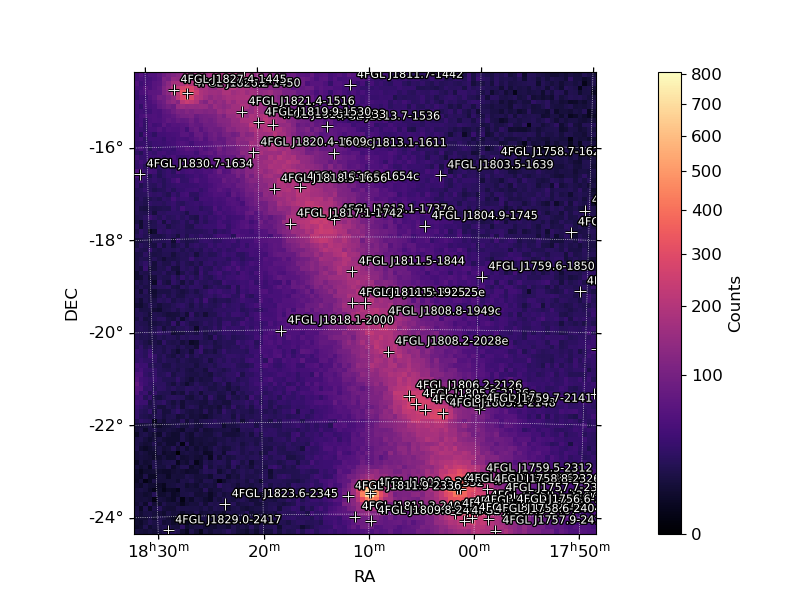

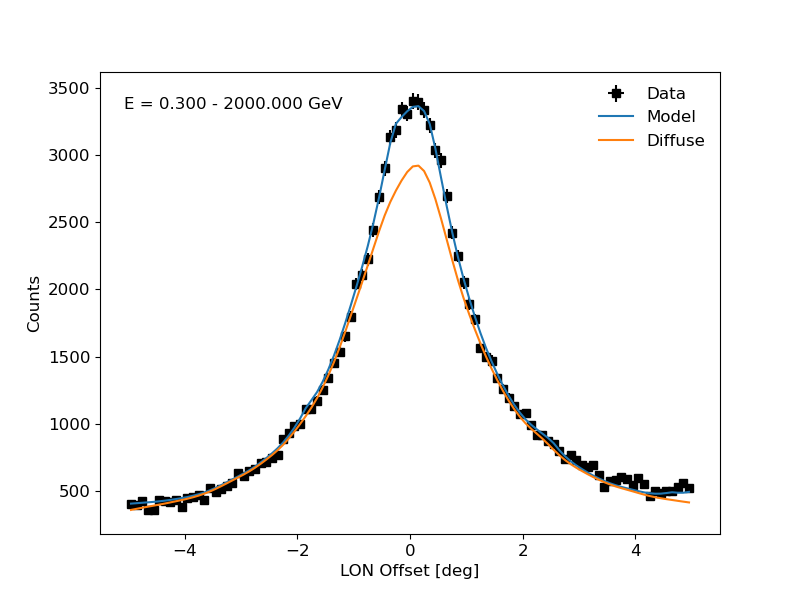

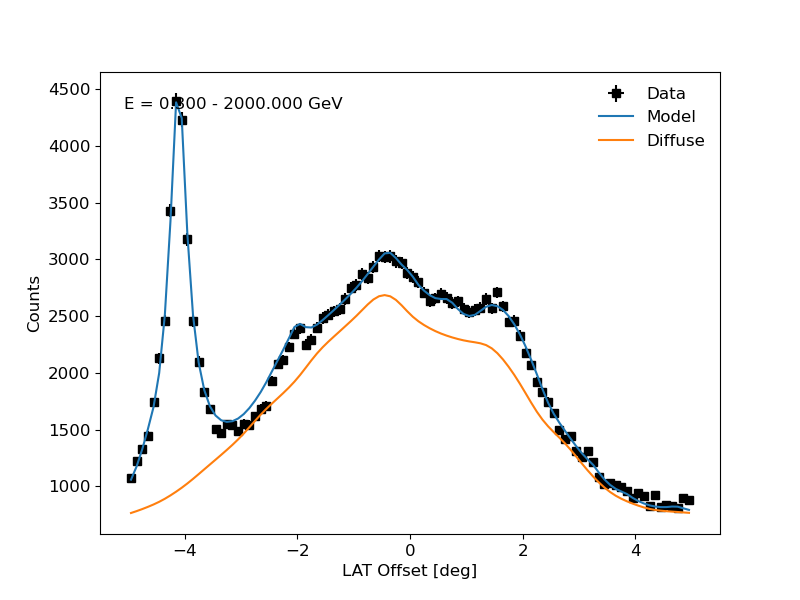

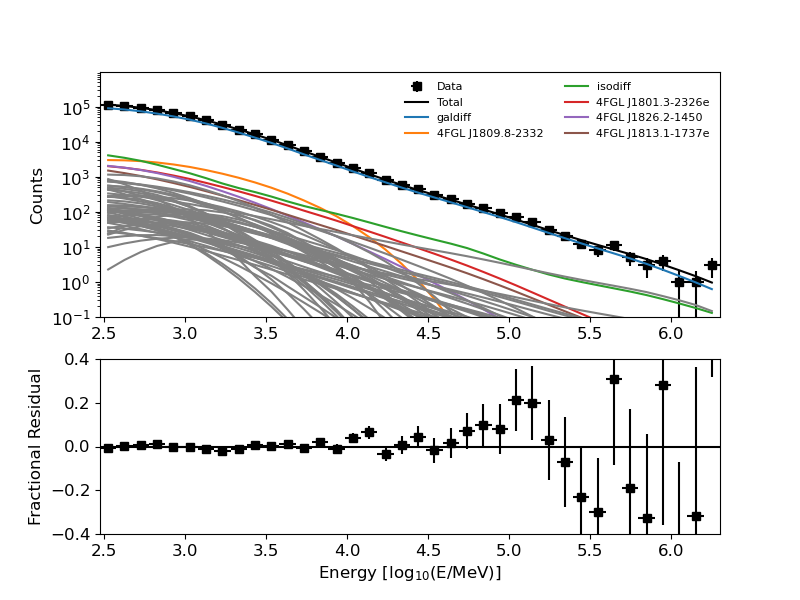

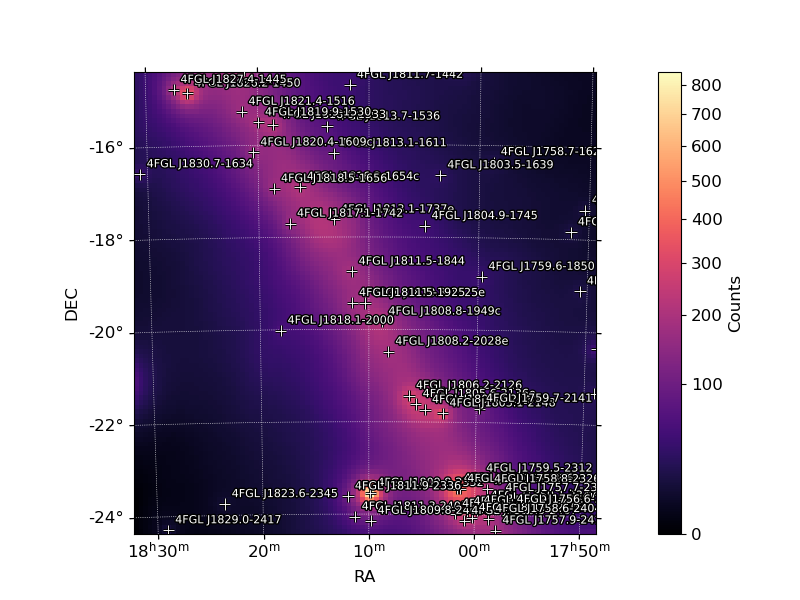

In [18]:
from IPython.display import display, Image
image_names = ['baseline_model_counts_map_2.477_6.301', 'baseline_model_counts_map_xproj_2.477_6.301', 'baseline_model_counts_map_yproj_2.477_6.301',
              'baseline_model_counts_spectrum', 'baseline_model_model_map_2.477_6.301']
for i in image_names:
    display(Image('data_300mev-2tev_12-year/%s.png'%i))

In [19]:
!export FERMI_DIFFUSE_DIR="/opt/anaconda/envs/fermi/share/fermitools/refdata/fermi/galdiffuse/"

To better visualize and inspect the fractional residuals, you may run Python in a terminal and copy and paste the code below: 

![CountsSpectrum](global_source_count_spectrum_failed_fit.png)

![FracResiduals](fractional_count_residuals_failed_fit.png)

Now we can see that the difference between the data and the model is too high for too many energy bins - something systematic seems to be affecting all energy bins below ~10^5MeV (100GeV). 

## How to improve the deviation of fractional residuals

Print out the global source model spectral parameters and inspect the ones that are left free.

In [20]:
gta.print_params(True)

2023-05-23 18:15:12 INFO    GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J1748.0-2446
   0 norm                      1.97    0.0888     1e-05     1e+03     1e-11    *
   1 alpha                     1.17         0        -5         5         1     
   2 beta                   0.00384         0        -2         2         1     
   3 Eb                    1.45e+03         0  1.45e+03  1.45e+03         1     
4FGL J1748.9-2021
   4 norm                      1.24    0.0372     1e-05     1e+03     1e-12    *
   5 alpha                     2.48         0        -5         5         1     
   6 beta                     0.489         0        -2         2         1     
   7 Eb                    1.66e+03         0  1.66e+03  1.66e+03         1     
4FGL J1749.0-2119
   8 norm                     0.965         0     1e-05     1e+03     1e-12     

You see for each source: the spectral model employed, the current best-fit values and errors (if free), the bounds (minimum, maximum) and what the scales are. The last column indicates whether the parameter is free ( * ) or fixed (empty). When there are issues with your fit, I suggest to focus on the best-fit values and errors first. It is a telltale sign when you see extremely (unphysically) small errors compared to the best-fit values that there is an error in the spectral definition for the source. The second detail to investigate are the bounds. It is not uncommon that FermiPy initializes a source model using best-fit values that are the same as the maximum bound values, preventing the fit from converging successfully. 

In this instance, the source 4FGL J1817.1-1742 has its ```Expfactor``` set to 0.862, and you notice that it is set to its maximum value, 0.862. This may be the reason why the error is unphysically small (~1e-04). You may notice some other sources that also have suspiciously small errors, we can also fix their spectral parameters for simplicity.

In [21]:
gta.free_sources(free=False)
gta.free_sources(minmax_ts=[25,None],pars='norm') #freeing only the normalization this time
gta.free_sources(distance=3.0,pars='norm') 

#fix all spectral parameters for "problem" sources
gta.free_source('4FGL J1813.1-1737e',False)
gta.free_source('4FGL J1809.8-2332',False)
gta.free_source('4FGL J1801.3-2326e',False)
gta.free_source('4FGL J1826.2-1450',False)
gta.free_source('4FGL J1803.1-2148',False)
gta.free_source('4FGL J1817.1-1742',False)

#free parameters for backgrounds
gta.free_source('galdiff')
gta.free_source('isodiff')

#free all spectral parameters for our source of interest
gta.free_source('4FGL J1810.3-1925e')

2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1810.3-1925e    : ['norm', 'alpha', 'beta']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1811.5-1925     : ['Prefactor', 'Index']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1808.8-1949c    : ['Prefactor', 'Index']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1811.5-1844     : ['norm', 'alpha', 'beta']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1808.2-2028e    : ['norm', 'alpha', 'beta']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1818.1-2000     : ['norm', 'alpha', 'beta']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1813.1-1737e    : ['norm', 'alpha', 'beta']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1804.9-1745     : ['Prefactor', 'Index']
2

2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1759.7-2354     : ['norm']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1757.7-2337     : ['Prefactor']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1748.9-2021     : ['norm']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1750.4-1721     : ['norm']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1800.9-2407     : ['norm']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1758.6-2404     : ['Prefactor']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1756.6-2352     : ['Prefactor']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1830.7-1634     : ['norm']
2023-05-23 18:15:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1821.1-1422     : ['no

In [22]:
baseline_refit = gta.fit(min_fit_quality=3)

2023-05-23 18:15:12 INFO    GTAnalysis.fit(): Starting fit.
2023-05-23 18:17:39 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2023-05-23 18:17:39 INFO    GTAnalysis.fit(): LogLike:   772827.511 DeltaLogLike:        4.313 


Notice the fit returned successfully, quality = 3 and status = 0.

In [23]:
gta.print_roi()

2023-05-23 18:17:39 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J1810.3-1925e  RadialDisk     LogParabola       0.000    145.23      2220.1
4FGL J1811.5-1925   PointSource    PowerLaw          0.280     32.07       252.5
4FGL J1808.8-1949c  PointSource    PowerLaw          0.537     64.70      1483.5
4FGL J1811.5-1844   PointSource    LogParabola       0.741    152.30      1990.0
4FGL J1808.2-2028e  RadialDisk     LogParabola       1.166    125.80      2854.4
4FGL J1818.1-2000   PointSource    LogParabola       1.921     36.79       176.0
4FGL J1813.1-1737e  RadialDisk     LogParabola       1.928    989.21      7306.0
4FGL J1804.9-1745   PointSource    PowerLaw          2.109     24.54       420.8
4FGL J1806.2-2126   PointSource    LogParabola       2.221    347.39      2998.8
4FGL J1817.1-1742   PointSource    PLSuperExpCuto    2.3

In [24]:
gta.print_params(True)

2023-05-23 18:17:40 INFO    GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J1748.0-2446
   0 norm                      1.95     0.346     1e-05     1e+03     1e-11    *
   1 alpha                     1.17         0        -5         5         1     
   2 beta                   0.00384         0        -2         2         1     
   3 Eb                    1.45e+03         0  1.45e+03  1.45e+03         1     
4FGL J1748.9-2021
   4 norm                      1.24     0.133     1e-05     1e+03     1e-12    *
   5 alpha                     2.48         0        -5         5         1     
   6 beta                     0.489         0        -2         2         1     
   7 Eb                    1.66e+03         0  1.66e+03  1.66e+03         1     
4FGL J1749.0-2119
   8 norm                     0.965         0     1e-05     1e+03     1e-12     

In [25]:
baseline_refit_model = gta.write_roi('baseline_refit_model.npy',make_plots=True)

2023-05-23 18:17:40 INFO    GTBinnedAnalysis.write_xml(): Writing /jeagle/extended_analysis/advanced_extension_analysis_example/data_300mev-2tev_12-year/baseline_refit_model_00.xml...
2023-05-23 18:17:40 INFO    GTAnalysis.write_fits(): Writing /jeagle/extended_analysis/advanced_extension_analysis_example/data_300mev-2tev_12-year/baseline_refit_model.fits...
2023-05-23 18:17:48 INFO    GTAnalysis.write_roi(): Writing /jeagle/extended_analysis/advanced_extension_analysis_example/data_300mev-2tev_12-year/baseline_refit_model.npy...


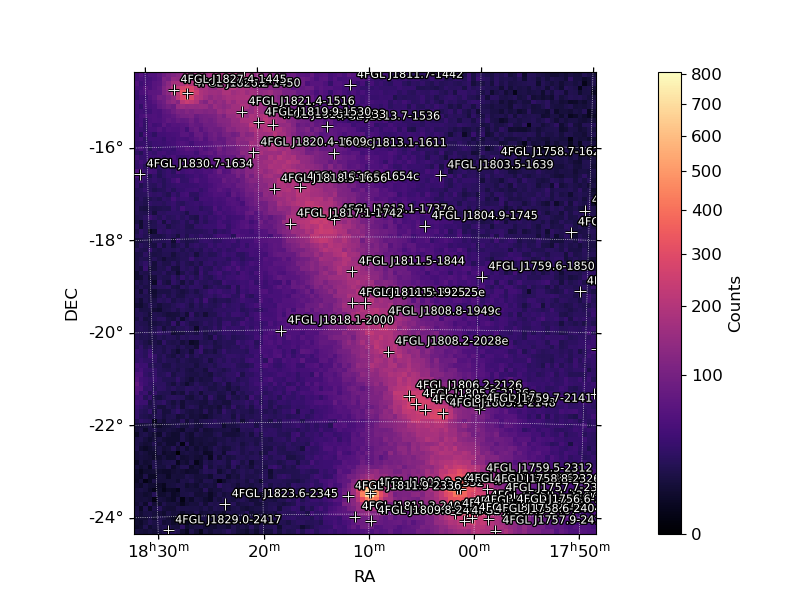

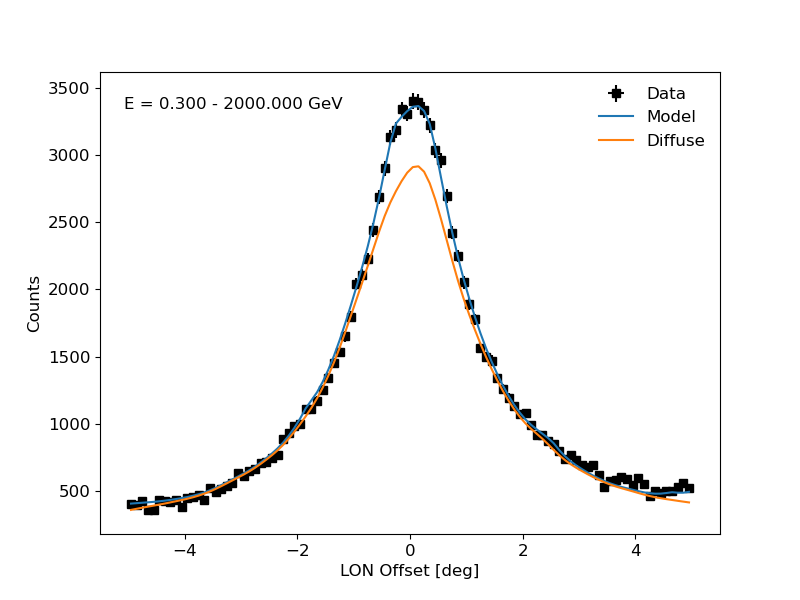

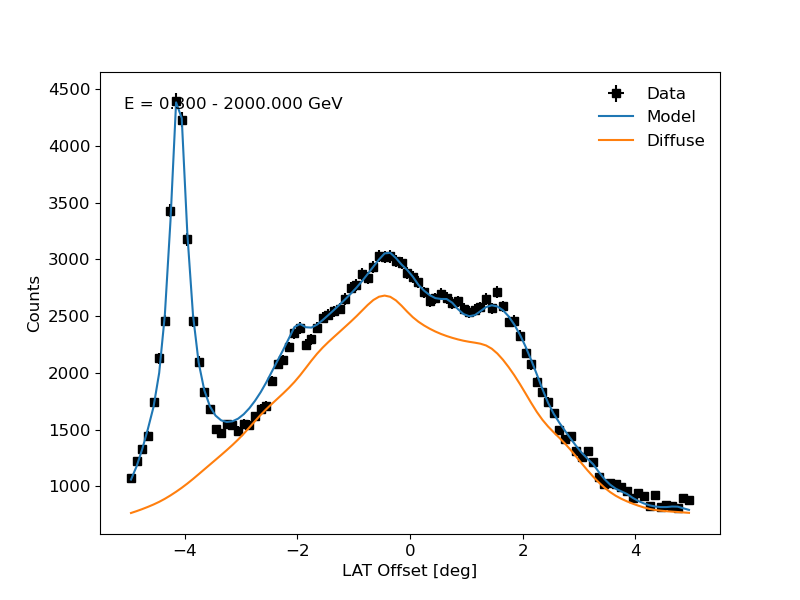

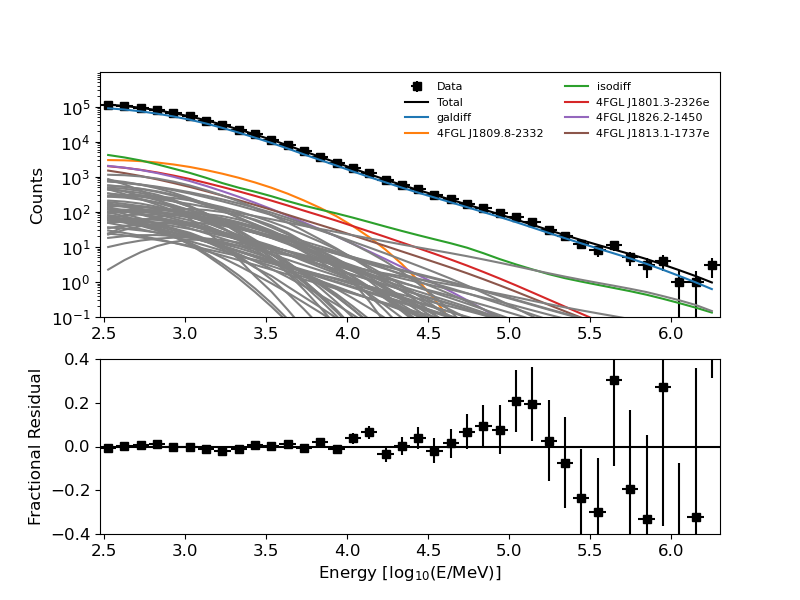

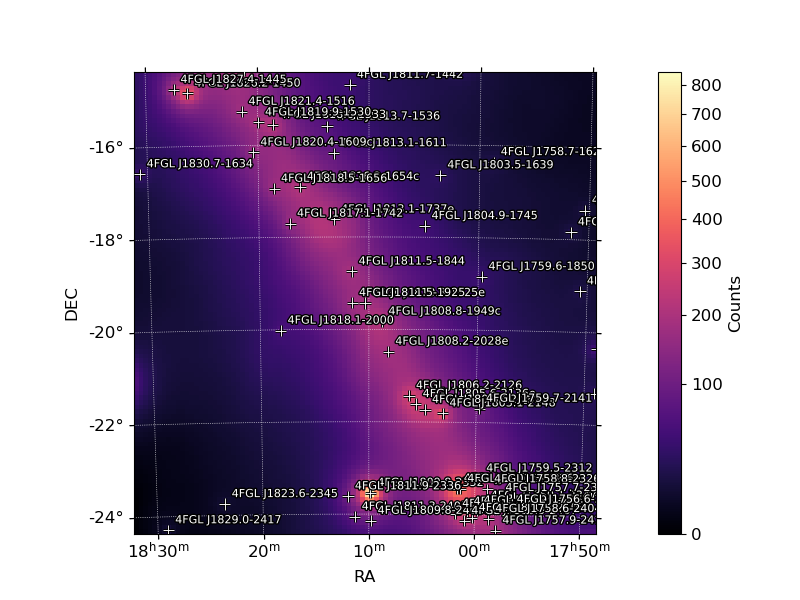

In [26]:
from IPython.display import display, Image
image_names = ['baseline_refit_model_counts_map_2.477_6.301', 'baseline_refit_model_counts_map_xproj_2.477_6.301', 'baseline_refit_model_counts_map_yproj_2.477_6.301',
              'baseline_refit_model_counts_spectrum', 'baseline_refit_model_model_map_2.477_6.301']
for i in image_names:
    display(Image('data_300mev-2tev_12-year/%s.png'%i))

![CountsSpectrum](global_source_count_spectrum_successful_fit.png)

![FracResiduals](fractional_count_residuals_successful_fit.png)

Hm. There is no change! We notice that the data is being **undermodeled** by the current source model, particularly for energies below ~100GeV. This may mean there are a number of significant residual excesses in the region of interest (ROI) that are not being accounted for in the model. In order to investigate this issue further, I would recommend making a TS map. 

In [27]:
global_ts = gta.tsmap('300mev-2tev_global_model',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2023-05-23 18:18:17 INFO    GTAnalysis.tsmap(): Generating TS map
2023-05-23 18:18:38 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2023-05-23 18:18:50 INFO    GTAnalysis.tsmap(): Finished TS map
2023-05-23 18:18:55 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /jeagle/extended_analysis/advanced_extension_analysis_example/data_300mev-2tev_12-year/300mev-2tev_global_model_pointsource_powerlaw_2.00_tsmap.npy
2023-05-23 18:18:55 INFO    GTAnalysis.tsmap(): Execution time: 38.09 s


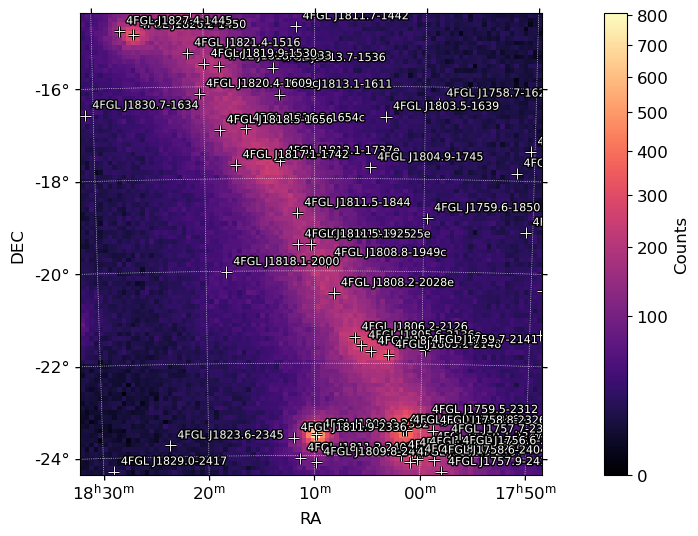

<Figure size 800x600 with 0 Axes>

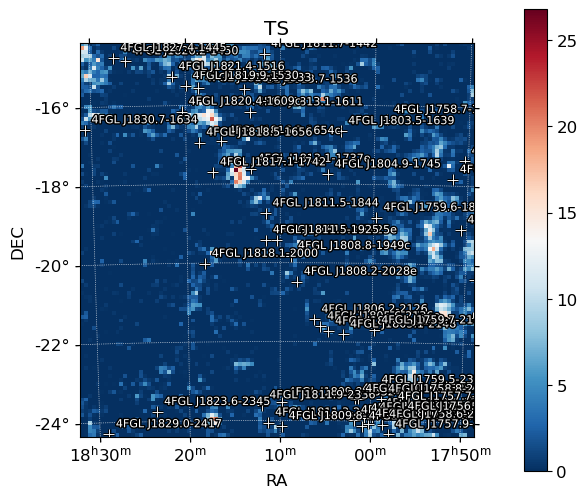

In [28]:
from fermipy.plotting import ROIPlotter
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(global_ts['ts'],roi=gta.roi).plot(vmin=np.min(global_ts['ts']),vmax=np.max(global_ts['ts']),subplot=122,cmap='RdBu_r')
plt.gca().set_title('TS')
plt.show()

## On Your Own

Ah, ha! Indeed there are several nearby significant (TS ~ 25) residual excesses in the ROI that are not (but should be) included in the source model. We will not do this here, but I will leave it up to you all as an on-your-own exercise. I include example command lines below that you can test out later to improve the model fit! 

For example, consider adding these sources to the fit to take care of the corresponding residual excesses:
* PS1 = RA, Dec = 273.653, -17.779 max_ts ~ 28 
* PS2 = RA, Dec = 274.291, -16.485 max_ts ~ 23

With new fit including PS1 and PS2, you can generate a new TS map to view if the excesses are sufficiently gone. Then, take a look at fractional residuals for the global source spectrum as we did above. I include an example of what a **corrected** fractional residual plot should look like in this folder as ```example_of_corrected_fractional_count_residuals_successful_fit.pdf```.

In [29]:
print(baseline_refit['loglike'])
fgl_ts = gta.roi['4FGL J1810.3-1925e']['ts']
fgl_ra = gta.roi['4FGL J1810.3-1925e']['ra']
fgl_dec = gta.roi['4FGL J1810.3-1925e']['dec']
fgl_spatial_model = gta.roi['4FGL J1810.3-1925e']['SpatialModel']
fgl_spatial_width = gta.roi['4FGL J1810.3-1925e']['SpatialWidth']
print(fgl_ts)
print(fgl_ra,fgl_dec)
print(fgl_spatial_model)
print(fgl_spatial_width)

772827.5108213568
145.2347210785374
272.59 -19.43
RadialDisk
0.41231056256176607


## Now let's verify its extension

In [31]:
gta.delete_source('4FGL J1810.3-1925e')

2023-05-23 18:18:56 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1810.3-1925e


In [32]:
gta.add_source('ps',{'ra' : 272.59, 'dec' : -19.43, 'SpectrumType' : 'PowerLaw', 'Index' : 2.0, 'SpatialModel' : 'PointSource'})

2023-05-23 18:18:56 INFO    GTAnalysis.add_source(): Adding source ps


In [33]:
gta.print_roi()

2023-05-23 18:19:17 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
ps                  PointSource    PowerLaw          0.000       nan       335.0
4FGL J1811.5-1925   PointSource    PowerLaw          0.280     32.07       252.5
4FGL J1808.8-1949c  PointSource    PowerLaw          0.537     64.70      1483.5
4FGL J1811.5-1844   PointSource    LogParabola       0.741    152.30      1990.0
4FGL J1808.2-2028e  RadialDisk     LogParabola       1.166    125.80      2854.4
4FGL J1818.1-2000   PointSource    LogParabola       1.921     36.79       176.0
4FGL J1813.1-1737e  RadialDisk     LogParabola       1.928    989.21      7306.0
4FGL J1804.9-1745   PointSource    PowerLaw          2.109     24.54       420.8
4FGL J1806.2-2126   PointSource    LogParabola       2.221    347.39      2998.8
4FGL J1817.1-1742   PointSource    PLSuperExpCuto    2.3

In [34]:
fit = gta.fit(min_fit_quality=3)

2023-05-23 18:19:17 INFO    GTAnalysis.fit(): Starting fit.
2023-05-23 18:21:04 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2023-05-23 18:21:04 INFO    GTAnalysis.fit(): LogLike:   772785.684 DeltaLogLike:       20.480 


In [35]:
gta.free_source('ps')

2023-05-23 18:21:04 INFO    GTAnalysis.free_source(): Freeing parameters for ps                    : ['Index']


In [36]:
ps_fit = gta.fit(min_fit_quality=3)

2023-05-23 18:21:04 INFO    GTAnalysis.fit(): Starting fit.
2023-05-23 18:23:19 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2023-05-23 18:23:19 INFO    GTAnalysis.fit(): LogLike:   772796.934 DeltaLogLike:       11.250 


In [37]:
print(gta.roi['ps'])

Name           : ps
Associations   : ['ps']
RA/DEC         :    272.590/   -19.430
GLON/GLAT      :     11.048/    -0.118
TS             : 48.92
Npred          : 1152.56
Flux           : 1.212e-08 +/-  2.3e-09
EnergyFlux     : 9.125e-06 +/- 1.63e-06
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  2.726e-12 +/-  4.756e-13
b'Index'       :     -2.657 +/-     0.1271
b'Scale'       :       1000 +/-        nan


In [38]:
gta.write_roi('ps_model.npy',make_plots=True)

2023-05-23 18:23:19 INFO    GTBinnedAnalysis.write_xml(): Writing /jeagle/extended_analysis/advanced_extension_analysis_example/data_300mev-2tev_12-year/ps_model_00.xml...
2023-05-23 18:23:19 INFO    GTAnalysis.write_fits(): Writing /jeagle/extended_analysis/advanced_extension_analysis_example/data_300mev-2tev_12-year/ps_model.fits...
2023-05-23 18:23:27 INFO    GTAnalysis.write_roi(): Writing /jeagle/extended_analysis/advanced_extension_analysis_example/data_300mev-2tev_12-year/ps_model.npy...


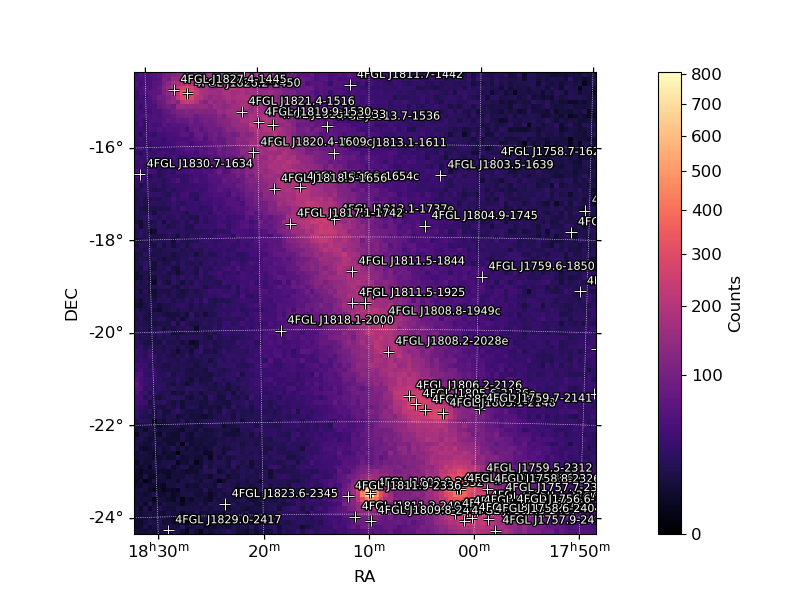

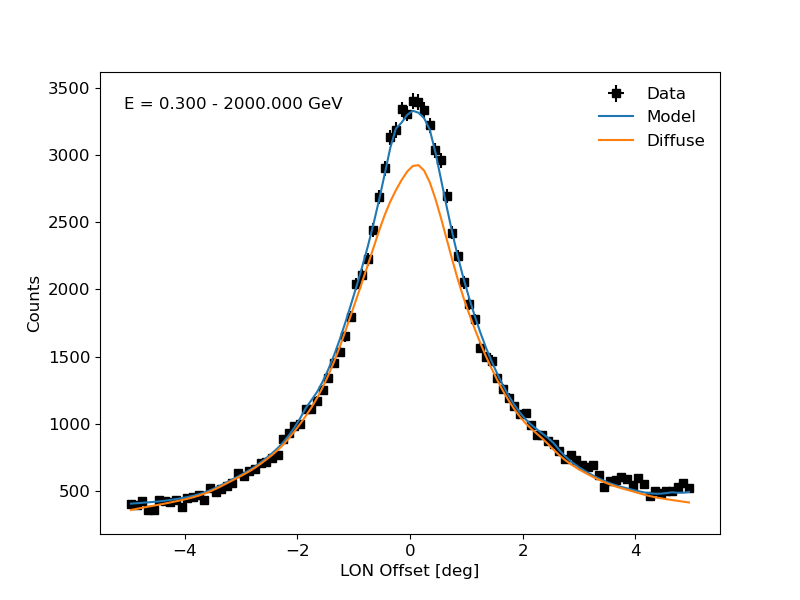

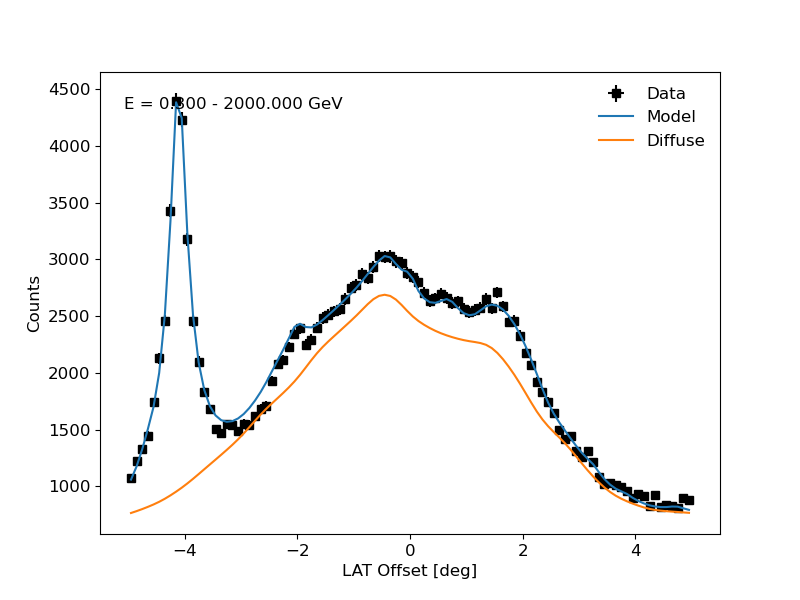

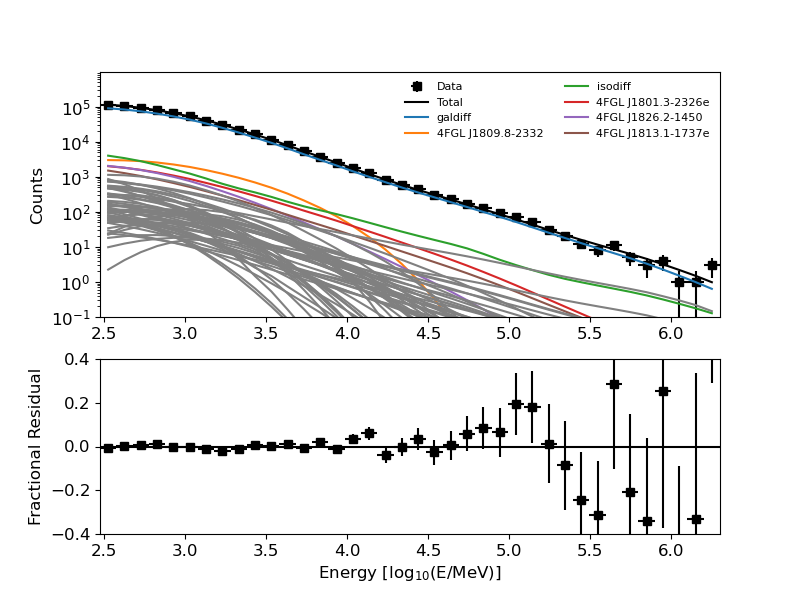

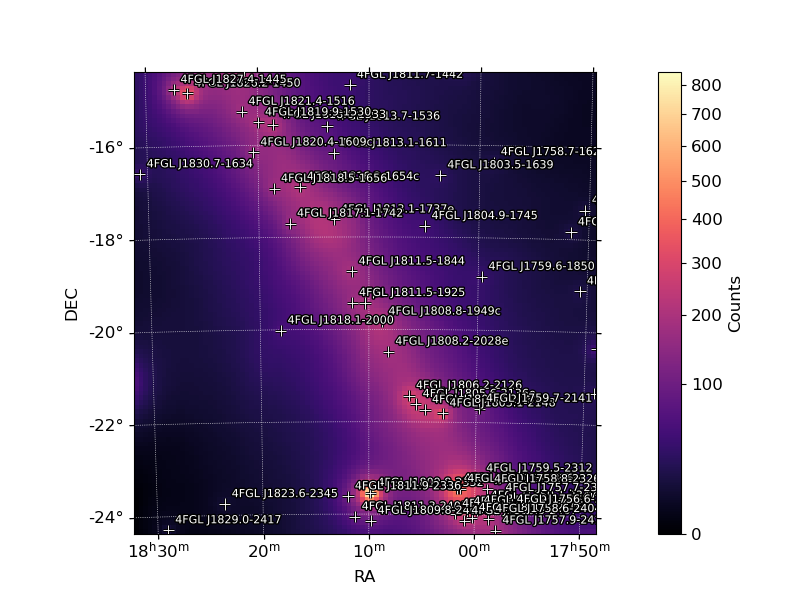

In [39]:
from IPython.display import display, Image
image_names = ['ps_model_counts_map_2.477_6.301', 'ps_model_counts_map_xproj_2.477_6.301', 'ps_model_counts_map_yproj_2.477_6.301',
              'ps_model_counts_spectrum', 'ps_model_model_map_2.477_6.301']
for i in image_names:
    display(Image('data_300mev-2tev_12-year/%s.png'%i))

# Advanced extension fitting 

We can run extension tests using gta.extension() on the point source we just found above. We will free the position during extension fitting this time. We can further explore any dependencies by allowing more parameters to vary like the background components. The computing time increases with more free parameters though. (In fact, when I executed the extension tests with both position and background free it took over 8 hours!). 

In [40]:
rd = gta.extension('ps',fit_position=True,spatial_model='RadialDisk')

2023-05-23 18:23:29 INFO    GTAnalysis.extension(): Running extension fit for ps
2023-05-23 18:24:18 INFO    GTAnalysis._fit_extension_full(): Iter 0 R68 =    0.393 Offset =    0.152 LogLikelihood =  772815.74 Delta-LogLikelihood =    18.80
2023-05-23 18:25:08 INFO    GTAnalysis._fit_extension_full(): Iter 1 R68 =    0.433 Offset =    0.112 LogLikelihood =  772817.29 Delta-LogLikelihood =     1.56
2023-05-23 18:25:58 INFO    GTAnalysis._fit_extension_full(): Iter 2 R68 =    0.452 Offset =    0.112 LogLikelihood =  772817.71 Delta-LogLikelihood =     0.42
2023-05-23 18:26:48 INFO    GTAnalysis._fit_extension_full(): Iter 3 R68 =    0.451 Offset =    0.110 LogLikelihood =  772817.69 Delta-LogLikelihood =    -0.02
2023-05-23 18:26:48 INFO    GTAnalysis._extension(): Fitting extended-source model.
2023-05-23 18:26:55 INFO    GTAnalysis._extension(): Generating TS map.
2023-05-23 18:27:21 INFO    GTAnalysis._extension(): Testing point-source model.
2023-05-23 18:27:21 INFO    GTAnalysis.loc

{'spatial_model': 'RadialDisk', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialDisk', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': Tr

2023-05-23 18:28:21 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /jeagle/extended_analysis/advanced_extension_analysis_example/data_300mev-2tev_12-year/ps_ext.npy
2023-05-23 18:28:21 INFO    GTAnalysis.extension(): Execution time: 292.02 s


{'name': 'ps', 'file': None, 'config': {'spatial_model': 'RadialDisk', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01258925, 0.01584893, 0.01995262,
       0.02511886, 0.03162278, 0.03981072, 0.05011872, 0.06309573,
       0.07943282, 0.1       , 0.12589254, 0.15848932, 0.19952623,
       0.25118864, 0.31622777, 0.39810717, 0.50118723, 0.63095734,
       0.79432823, 1.        ]), 'dloglike': array([  1.18936185,

In [41]:
rg = gta.extension('ps',fit_position=True,spatial_model='RadialGaussian')

2023-05-23 18:28:21 INFO    GTAnalysis.extension(): Running extension fit for ps
2023-05-23 18:29:12 INFO    GTAnalysis._fit_extension_full(): Iter 0 R68 =    0.406 Offset =    0.141 LogLikelihood =  772814.13 Delta-LogLikelihood =    17.20
2023-05-23 18:30:03 INFO    GTAnalysis._fit_extension_full(): Iter 1 R68 =    0.427 Offset =    0.143 LogLikelihood =  772814.23 Delta-LogLikelihood =     0.10
2023-05-23 18:30:03 INFO    GTAnalysis._extension(): Fitting extended-source model.
2023-05-23 18:30:10 INFO    GTAnalysis._extension(): Generating TS map.
2023-05-23 18:30:36 INFO    GTAnalysis._extension(): Testing point-source model.
2023-05-23 18:30:36 INFO    GTAnalysis.localize(): Running localization for ps
2023-05-23 18:31:09 INFO    GTAnalysis._localize(): Localization succeeded.
2023-05-23 18:31:09 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (  272.0654 +/-   0.0513,  -19.4930 +/-   0.0421)
(glon,glat) = (   10.7538 +/-   0.0475,    0.2845

{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_f

2023-05-23 18:31:36 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /jeagle/extended_analysis/advanced_extension_analysis_example/data_300mev-2tev_12-year/ps_ext.npy
2023-05-23 18:31:36 INFO    GTAnalysis.extension(): Execution time: 194.70 s


{'name': 'ps', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': True, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01258925, 0.01584893, 0.01995262,
       0.02511886, 0.03162278, 0.03981072, 0.05011872, 0.06309573,
       0.07943282, 0.1       , 0.12589254, 0.15848932, 0.19952623,
       0.25118864, 0.31622777, 0.39810717, 0.50118723, 0.63095734,
       0.79432823, 1.        ]), 'dloglike': array([  0.32389

In [42]:
print('LogLikelihood :', rd['loglike_ext'])
print('TS_ext :', rd['ts_ext'])
print('RA,Dec J2000 in deg :', rd['ra'],rd['dec'])
print('Best-fit extension in deg :', rd['ext'])
print('Error on extension in deg :', rd['ext_err'])
print('95% upper limit on extension in deg :', rd['ext_ul95'])

LogLikelihood : 772817.6895990563
TS_ext : 43.16820462443866
RA,Dec J2000 in deg : 272.4736135868365 -19.417338471979143
Best-fit extension in deg : 0.4513896282533927
Error on extension in deg : 0.02210226939913215
95% upper limit on extension in deg : 0.4937983880321382


In [43]:
print('LogLikelihood :', rg['loglike_ext'])
print('TS_ext :', rg['ts_ext'])
print('RA,Dec J2000 in deg :', rg['ra'],rg['dec'])
print('Best-fit extension in deg :', rg['ext'])
print('Error on extension in deg :', rg['ext_err'])
print('95% upper limit on extension in deg :', rg['ext_ul95'])

LogLikelihood : 772814.2297456893
TS_ext : 36.53887642477639
RA,Dec J2000 in deg : 272.4382541621459 -19.42898733905959
Best-fit extension in deg : 0.42654515945326565
Error on extension in deg : 0.046198918293380326
95% upper limit on extension in deg : 0.5019516415118486


# Interpretation of results

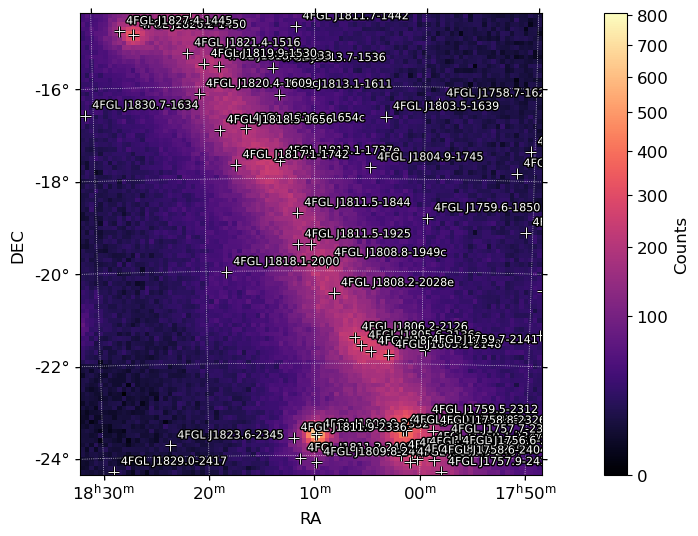

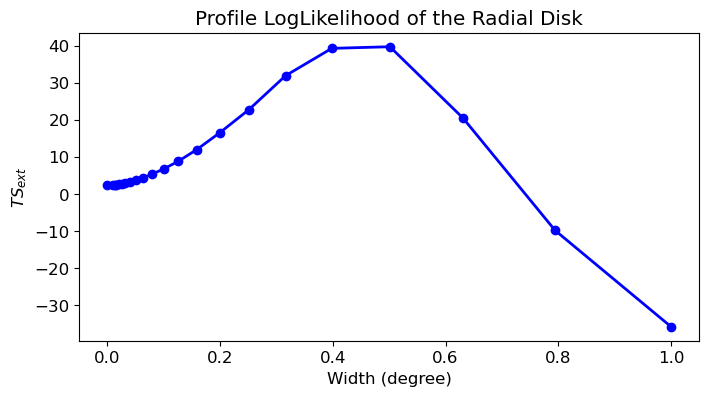

In [44]:
plt.figure(figsize=(8,4))
width = rd['width']
ts_ext = 2*rd['dloglike']
#plt.ylim(-10,10)
#plt.xlim(0.35,0.6)
plt.plot(width,ts_ext,marker='o',color='blue',lw=2,label=r'$TS_{ext}$')
plt.title('Profile LogLikelihood of the Radial Disk')
plt.ylabel(r'$TS_{ext}$')
plt.xlabel(r'Width (degree)')
plt.show()

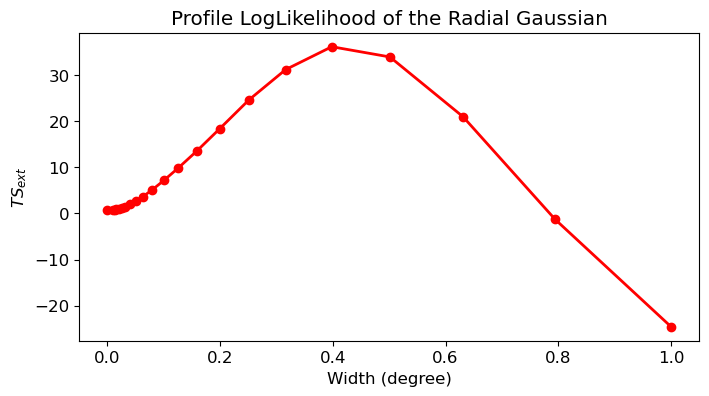

In [45]:
plt.figure(figsize=(8,4))
width = rg['width']
ts_ext = 2*rg['dloglike']
plt.plot(width,ts_ext,marker='o',color='red',lw=2,label=r'$TS_{ext}$')
plt.title('Profile LogLikelihood of the Radial Gaussian')
plt.ylabel(r'$TS_{ext}$')
plt.xlabel(r'Width (degree)')
plt.show()

In [46]:
global_ts = 2*(rd['loglike_ext']-rg['loglike_ext'])
print('Radial Disk is preferred over Radial Gaussian by TS = ', global_ts, '~',np.sqrt(global_ts), 'sigma')

Radial Disk is preferred over Radial Gaussian by TS =  6.919706733897328 ~ 2.6305335454803327 sigma


Initial conclusions: In both spatial templates tested, there is a maximized likelihood at the extension size = 0.45 (disk) and 0.43 (gaussian). There are no other sizes that provide a similar statistical fit. The radial disk is marginally preferred at almost 3 sigma significance over the gaussian template. We compare the radial disk fit found here to the original radial disk 0.41 deg model from J1810.3-1925e below. 

## Exploring potential dependencies

For example, now that we have tested a variety of radii while both the position of our source and the background spectral components are left free, is there a need to consider how the radius and position influence each other and hence the uncertainties on extension?

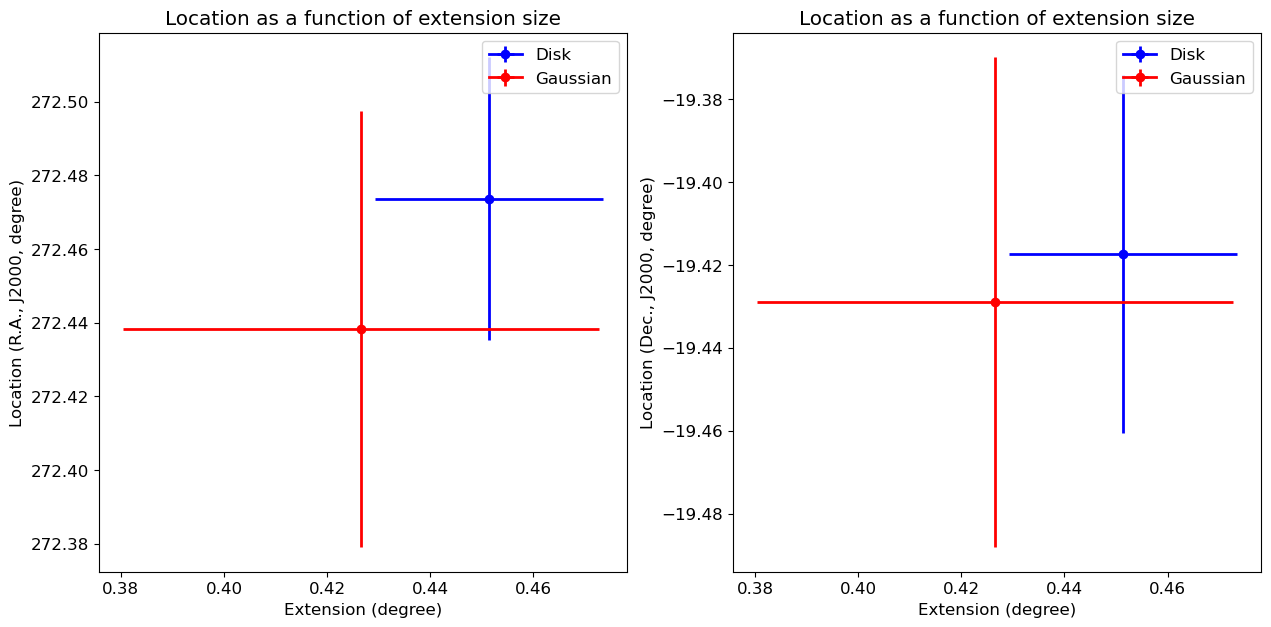

In [47]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
rd_ra = rd['ra']
rd_dec = rd['dec']
rd_ext = rd['ext']
rd_ra_err = rd['ra_err']
rd_dec_err = rd['dec_err']
rd_ext_err = rd['ext_err']

rg_ra = rg['ra']
rg_dec = rg['dec']
rg_ext = rg['ext']
rg_ra_err = rg['ra_err']
rg_dec_err = rg['dec_err']
rg_ext_err = rg['ext_err']


ax1.errorbar(rd_ext,rd_ra,xerr=rd_ext_err,yerr=rd_ra_err,marker='o',color='blue',lw=2,label=r'Disk')
ax1.errorbar(rg_ext,rg_ra,xerr=rg_ext_err,yerr=rg_ra_err,marker='o',color='red',lw=2,label=r'Gaussian')
ax1.legend(loc='best')
ax1.set_title('Location as a function of extension size')
ax1.set_ylabel(r'Location (R.A., J2000, degree)')
ax1.set_xlabel(r'Extension (degree)')


ax2.errorbar(rd_ext,rd_dec,xerr=rd_ext_err,yerr=rd_dec_err,marker='o',color='blue',lw=2,label=r'Disk')
ax2.errorbar(rg_ext,rg_dec,xerr=rg_ext_err,yerr=rg_dec_err,marker='o',color='red',lw=2,label=r'Gaussian')
ax2.legend(loc='best')
ax2.set_title('Location as a function of extension size')
ax2.set_ylabel(r'Location (Dec., J2000, degree)')
ax2.set_xlabel(r'Extension (degree)')
plt.show()

Discussion: Above we plot the Right Ascension (R.A.) coordinate in degree as a function of extension for both templates tested. The right plot shows the Declination (Dec.) coordinate in degree as a function of extension. The error bars correspond to the errors on the R.A. or Dec. (y) and extension (x). 

We see that the position increases in value in both R.A., and Dec. for the radial disk template with respect to the gaussian template. This could be indicating a correlation of some kind between the shape assumed for extended source emission and its best-fit location, but within uncertainties, it is not a very suggestive correlation. 

Ways to explore this behavior would be to plot more than one source's extension fit parameters like we did above and see if the trend exists. 

**Short answer: Not likely.**

## Compare to original source model

Remember our saved instance under ```baseline_refit```? Let's compare our best-fit extension values found above with those of the ```baseline_refit```. Here, we will assume the Gaussian since it yields the highest LogLikelihood and TS. 

In [48]:
print(baseline_refit['loglike'])
print(fgl_ts)
print(fgl_ra,fgl_dec)
print(fgl_spatial_model)
print(fgl_spatial_width)

772827.5108213568
145.2347210785374
272.59 -19.43
RadialDisk
0.41231056256176607


In [49]:
print('LogLikelihood :', rd['loglike_ext'])
print('TS_ext :', rd['ts_ext'])
print('RA,Dec J2000 in deg :', rd['ra'],rd['dec'])
print('Best-fit extension in deg :', rd['ext'])
print('Error on extension in deg :', rd['ext_err'])
print('95% upper limit on extension in deg :', rd['ext_ul95'])

LogLikelihood : 772817.6895990563
TS_ext : 43.16820462443866
RA,Dec J2000 in deg : 272.4736135868365 -19.417338471979143
Best-fit extension in deg : 0.4513896282533927
Error on extension in deg : 0.02210226939913215
95% upper limit on extension in deg : 0.4937983880321382


We have found that the radial disk of the extended source emission can provide a similar statistical fit to the data. Note that this is still the case even though we assumed a simple power law, whereas 4FGL J1810.3-1925e assumed a curved ```LogParabola``` spectrum (which introduces an additional degree of freedom). 

In [50]:
global_ts = 2*(-rd['loglike_ext']+baseline_refit['loglike'])
print('0.41 deg Radial Disk is preferred over 0.45 Radial Disk by TS = ', global_ts, '~',np.sqrt(global_ts)/3, 'sigma')

0.41 deg Radial Disk is preferred over 0.45 Radial Disk by TS =  19.642444601049647 ~ 1.4773265869675098 sigma


In summary, because the original model has one additional degree of freedom compared to the fit we have developed with the r = 0.45 deg disk template, the statistical fits are both reasonable fits to the data. 